<a href="https://colab.research.google.com/github/ErigiVaishnavi/MachineLearning-Project/blob/main/Titanic_Survival_Prediction_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-Processing

In [19]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library based on Matplotlib, built on top of Matplotlib and integrates well with Pandas data structures.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [20]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('/content/train.csv')

In [21]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [23]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the Missing values

In [25]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [26]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [27]:
print(titanic_data['Age'].tolist())

[22.0, 38.0, 26.0, 35.0, 35.0, 29.69911764705882, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, 29.69911764705882, 31.0, 29.69911764705882, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, 29.69911764705882, 19.0, 29.69911764705882, 29.69911764705882, 40.0, 29.69911764705882, 29.69911764705882, 66.0, 28.0, 42.0, 29.69911764705882, 21.0, 18.0, 14.0, 40.0, 27.0, 29.69911764705882, 3.0, 19.0, 29.69911764705882, 29.69911764705882, 29.69911764705882, 29.69911764705882, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, 29.69911764705882, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, 29.69911764705882, 29.69911764705882, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, 29.69911764705882, 29.69911764705882, 0.83, 30.0, 22.0, 29.0, 29.69911764705882, 28.0, 17.0, 33.0, 16.0, 29.69911764705882, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, 29.69911764705882, 71.0, 23.0, 34.0, 34.0, 28.0, 29.69911764705882, 21.0, 33.0, 37.0, 28.0, 21.0, 29.69911764705882, 38.0, 29.69911764705882, 47.0, 14.5, 22.0, 20.0

In [28]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [29]:
print(titanic_data['Embarked'].mode()[0])

S


In [30]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [31]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [32]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#Data Visualization

In [34]:
sns.set()   #sets the default style parameters for plotting.

<Axes: xlabel='Survived', ylabel='count'>

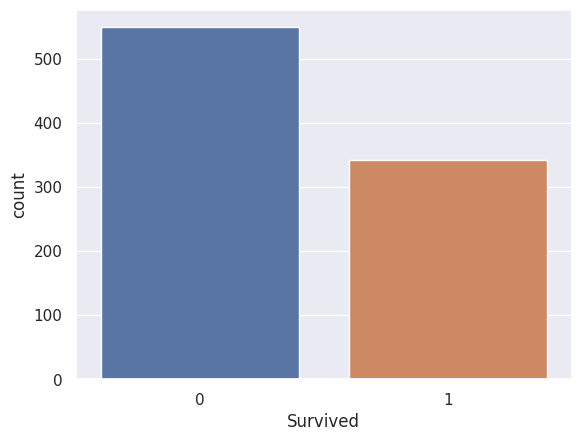

In [35]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [36]:
titanic_data['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

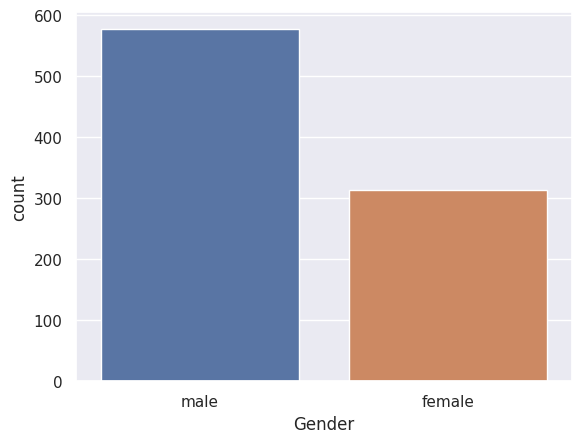

In [37]:
# making a count plot for "Gender" column
sns.countplot(x='Gender', data=titanic_data)

<Axes: xlabel='Gender', ylabel='count'>

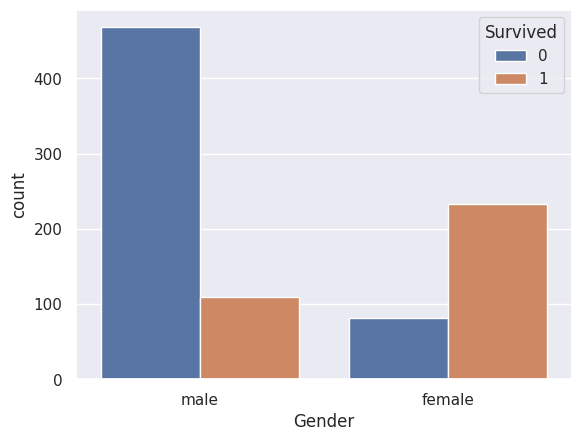

In [38]:
# number of survivors Gender wise
sns.countplot(x='Gender', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

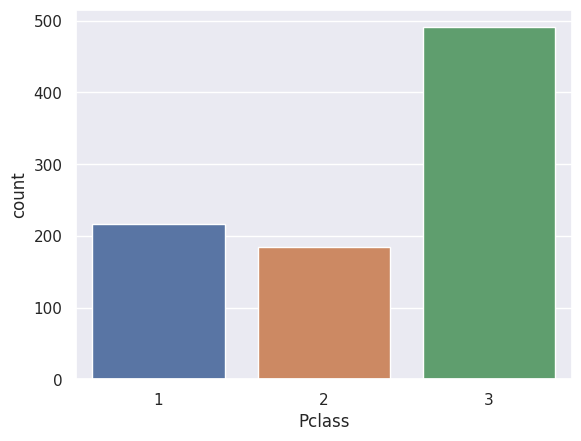

In [39]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

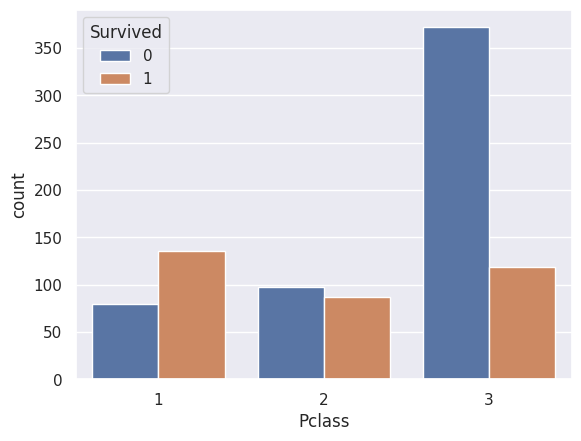

In [40]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

Encoding the Categorical Columns

In [41]:
titanic_data['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [42]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
# converting categorical Columns

titanic_data.replace({'Gender':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [44]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#Extracting Dependent Independent variables

In [45]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [46]:
print(X) #Independent Variables

     Pclass  Gender        Age  SibSp  Parch     Fare  Embarked
0         3       0  22.000000      1      0   7.2500         0
1         1       1  38.000000      1      0  71.2833         1
2         3       1  26.000000      0      0   7.9250         0
3         1       1  35.000000      1      0  53.1000         0
4         3       0  35.000000      0      0   8.0500         0
..      ...     ...        ...    ...    ...      ...       ...
886       2       0  27.000000      0      0  13.0000         0
887       1       1  19.000000      0      0  30.0000         0
888       3       1  29.699118      1      2  23.4500         0
889       1       0  26.000000      0      0  30.0000         1
890       3       0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [47]:
print(Y) #Dependent Variable

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#Splitting the data into Training set & Test set

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


#Model Training

Fitting Logistic Regression to the Training set

In [50]:
model = LogisticRegression()

In [51]:
# training the Logistic Regression model with training data
model = LogisticRegression(max_iter=1000)  # that updates the weights in each iteration to minimize the cost function.
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

Accuracy Score and confusion matrix for training and test set

In [52]:
# accuracy on test data 
Y_prediction = model.predict(X_test)  #we are using the trained model to predict the target variable for the test data

In [53]:
print(Y_prediction)   #priting predicted target values (survival outcomes)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [54]:
#accuracy score
test_data_accuracy = accuracy_score(Y_test, Y_prediction)

# assume that Y_test are the actual labels and Y_pred are the predicted labels
conf_matrix = confusion_matrix(Y_test, Y_prediction)
tp = conf_matrix[1,1]
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]

#Calculating Precision, Recall and F1 Score
precision = precision_score(Y_test, Y_prediction) #tp/(tp+fp)
recall = recall_score(Y_test, Y_prediction)       #tp/(tp+fn)
f1 = f1_score(Y_test,Y_prediction)

In [55]:
print('Accuracy score of test data : ', test_data_accuracy)   #here accuracy is correctly predicted the target variable for 78% of the test dataset.
print("True positives: ", tp)                  #the no.of positive cases that the model correctly predicted.
print("True negatives: ", tn)                  #The no.of negative cases that the model correctly predicted.
print("False positives: ", fp)                 #the no.of negative cases that the model incorrectly predicted as positive.
print("False negatives: ", fn)                 #the n0.of positive cases that the model incorrectly predicted as negative.
print("Confusion Matrix:\n",conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy score of test data :  0.7821229050279329
True positives:  49
True negatives:  91
False positives:  9
False negatives:  30
Confusion Matrix:
 [[91  9]
 [30 49]]
Precision: 0.8448275862068966
Recall: 0.620253164556962
F1 Score: 0.7153284671532847
